In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Question 1

In [4]:
df=pd.read_csv('driverdata.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


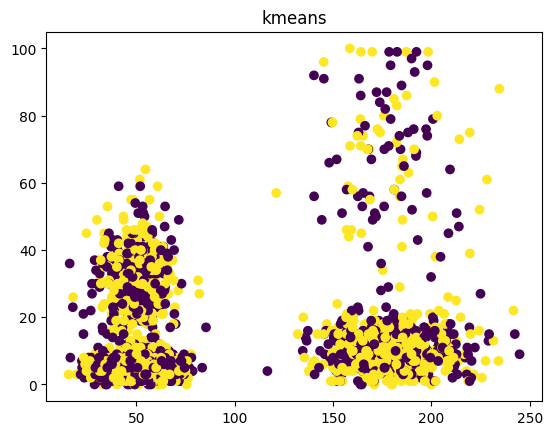

In [5]:
# Applying KMeans to the dataset

import numpy as np

def kmeans(df, k, max_iters=100):
    X = df.values
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=1)
        
        new_centroids = _update_centroids(X, labels, k)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

def _update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

y_pred, centres= kmeans(df, 2)

plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'],c=y_pred)
plt.title('kmeans');

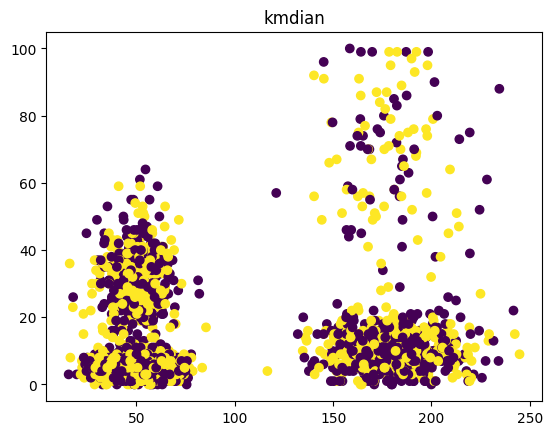

In [6]:
# applying kMedian to dataset

import numpy as np

def kmedian(df, k, max_iters=100):
    # Convert DataFrame to numpy array
    X = df.values
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for _ in range(max_iters):
        labels = assign_labels(X, centroids)
        centroids = update_centroids(X, labels, k)
    
    return labels, centroids

def assign_labels(X, centroids):
    distances = np.abs(X[:, np.newaxis] - centroids)
    labels = np.argmin(np.sum(distances, axis=-1), axis=1)
    return labels

def update_centroids(X, labels, k):
    return np.array([np.median(X[labels == i], axis=0) for i in range(k)])

y_pred, centres= kmedian(df, 2)

plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'],c=y_pred)
plt.title('kmdian');

In [7]:
# Question 2

<AxesSubplot: >

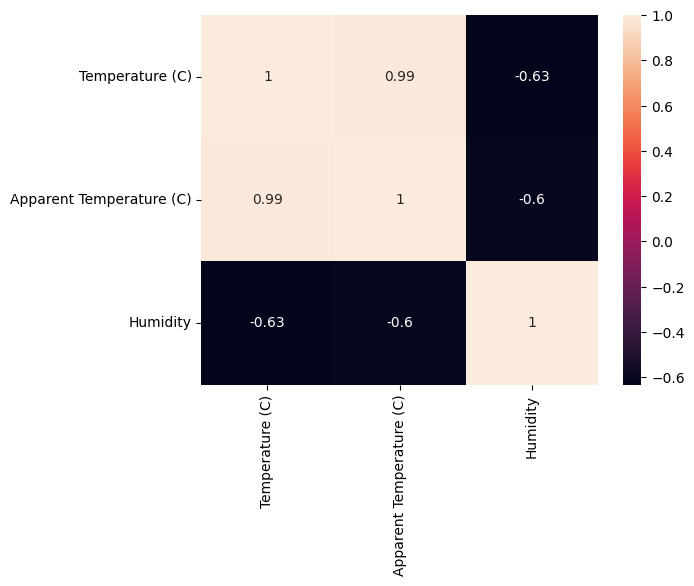

In [8]:
df = pd.read_csv('weatherHistory.csv')

df = df[['Temperature (C)','Apparent Temperature (C)','Humidity']]

import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [9]:
# There is a negative correaltion between Temperature and humidity meaning that as temperature increases humidity decreases.
# There is a negative correlation between apparent temperature and humidity meaning that as apparent temperature increases humidity decreases.

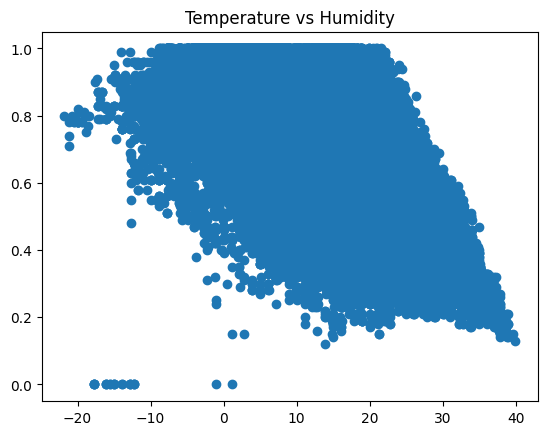

In [10]:
plt.scatter(df['Temperature (C)'],df['Humidity'])
plt.title('Temperature vs Humidity');

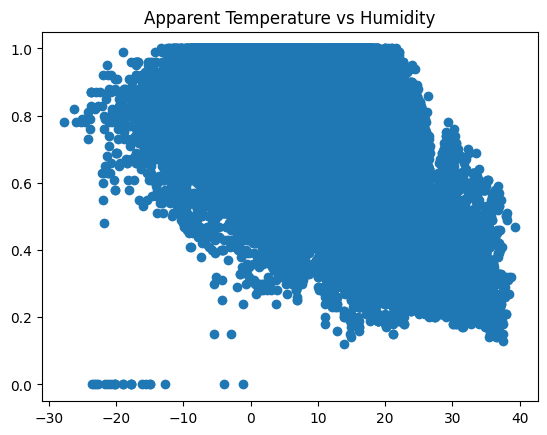

In [11]:
plt.scatter(df['Apparent Temperature (C)'],df['Humidity'])
plt.title('Apparent Temperature vs Humidity');

In [12]:
# Train test split

from sklearn.model_selection import train_test_split
X=df[['Humidity']]
y=df[['Apparent Temperature (C)']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(y_pred)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

[[17.62498182]
 [ 7.72630589]
 [13.66551145]
 ...
 [17.62498182]
 [17.29502595]
 [15.64524663]]


74.1914707528898

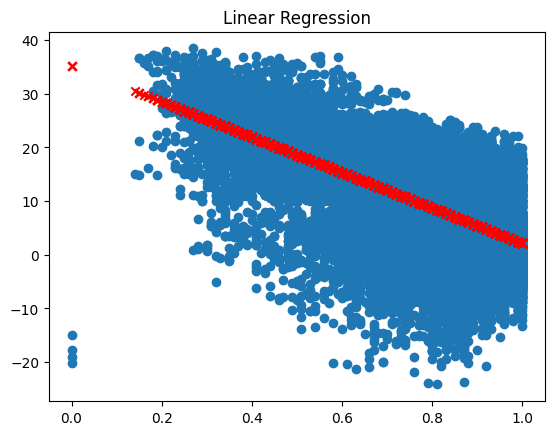

In [13]:
# visualizing the model

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,color='red', marker='x')
plt.title('Linear Regression');

In [14]:
# Question 4

input_weights = np.array([[0.1, 0.2, 0.3, 0.4], 
  [0.5, 0.6, 0.7, 0.8], 
  [0.9, 1.0, 1.1, 1.2]]) 
hidden_weights = np.array([[1.3, 1.4], 
    [1.5, 1.6], 
    [1.7, 1.8], 
    [1.9, 2.0]]) 
output_weights = np.array([[2.1, 2.2], 
    [2.3, 2.4], 
    [2.5, 2.6], 
    [2.7, 2.8]])

hidden_biases = np.array([0.9, 1.0, 1.1, 1.2])
output_biases = np.array([1.3, 1.4])

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
input_vector = np.array([0.5,0.1,0.9])

hidden_layer = np.dot(input_vector,input_weights)
print(hidden_layer)
hidden_sigmoid = sigmoid(hidden_layer)
print(hidden_sigmoid)

output_layer = np.dot(hidden_sigmoid,output_weights)
print(output_layer)
output_sigmoid = sigmoid(output_layer)
print(output_sigmoid)

[0.91 1.06 1.21 1.36]
[0.71300016 0.74269055 0.77029895 0.7957597 ]
[7.27978715 7.58196209]
[0.99931114 0.9994907 ]


In [16]:
def feedforward(input_vector, input_weights, hidden_weights, output_weights, hidden_biases, output_biases):
    hidden_layer = np.dot(input_vector,input_weights)
    hidden_sigmoid = sigmoid(hidden_layer)
    output_layer = np.dot(hidden_sigmoid,output_weights)
    output_sigmoid = sigmoid(output_layer)
    return output_sigmoid

feedforward(input_vector, input_weights, hidden_weights, output_weights, hidden_biases, output_biases)

array([0.99931114, 0.9994907 ])

In [18]:
# back propagation

def sigmoid_derivative(x):
    return x*(1-x)

learning_rate = 0.04

target = np.array([2])

def backpropagation(input_vector, input_weights, hidden_weights, output_weights, hidden_biases, output_biases, target):
    hidden_layer = np.dot(input_vector,input_weights)
    hidden_sigmoid = sigmoid(hidden_layer)
    output_layer = np.dot(hidden_sigmoid,output_weights)
    output_sigmoid = sigmoid(output_layer)
    output_error = target-output_sigmoid
    output_delta = output_error*sigmoid_derivative(output_sigmoid)
    hidden_error = np.dot(output_delta,output_weights.T)
    hidden_delta = hidden_error*sigmoid_derivative(hidden_sigmoid)
    output_weights += learning_rate*hidden_sigmoid*output_delta
    hidden_weights += learning_rate*input_vector*hidden_delta
    output_biases += learning_rate*output_delta
    hidden_biases += learning_rate*hidden_delta
    return output_sigmoid

print(backpropagation(input_vector, input_weights, hidden_weights, output_weights, hidden_biases, output_biases, target))

ValueError: operands could not be broadcast together with shapes (4,) (2,) 